# Number Plate Recognition

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
img = cv.imread('images/car1.jpg')

In [3]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

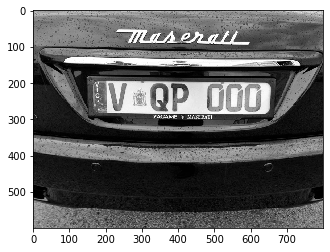

In [4]:
plt.imshow(cv.cvtColor(gray, cv.COLOR_BGR2RGB))

In [5]:
#cv2.imshow("grayscale",gray)
#cv2.waitKey(1)
#cv2.destroyAllWindows()

In [6]:
blurred = cv.GaussianBlur(gray, (5, 5), 0)

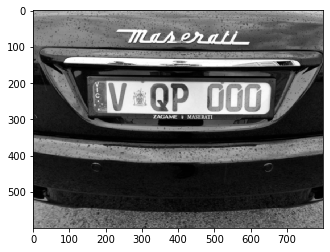

In [7]:
plt.imshow(cv.cvtColor(blurred, cv.COLOR_BGR2RGB))

In [8]:
_, threshold = cv.threshold(blurred, 192, 255, cv.THRESH_BINARY)

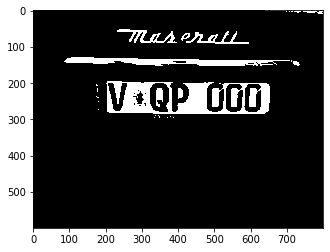

In [9]:
plt.imshow(cv.cvtColor(threshold, cv.COLOR_BGR2RGB))

In [10]:
# Noise removal
kernel = np.ones((3,3))
opening = cv.morphologyEx(threshold,cv.MORPH_OPEN,kernel, iterations = 2)

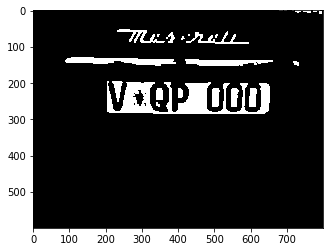

In [11]:
plt.imshow(cv.cvtColor(opening, cv.COLOR_BGR2RGB))

In [12]:
# Sure Background Area
sure_background = cv.dilate(opening, kernel, iterations=2)

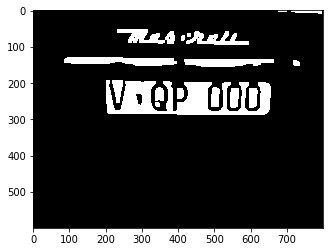

In [13]:
plt.imshow(cv.cvtColor(sure_background, cv.COLOR_BGR2RGB))

In [14]:
# Sure Foreground Area
distance_transform = cv.distanceTransform(opening, cv.DIST_L1, 5)

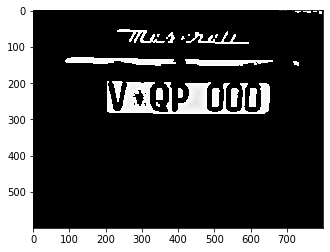

In [15]:
plt.imshow(cv.cvtColor((distance_transform*255).astype(np.uint8), cv.COLOR_BGR2RGB))

In [16]:
_, sure_foreground = cv.threshold(distance_transform, 0.7*distance_transform.max(), 255,0)

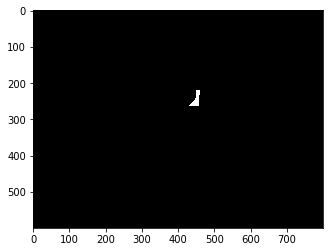

In [17]:
sure_foreground = np.uint8(sure_foreground)
plt.imshow(cv.cvtColor(sure_foreground, cv.COLOR_BGR2RGB))

In [18]:
# Find Unknown Region
unknown = cv.subtract(sure_background, sure_foreground)

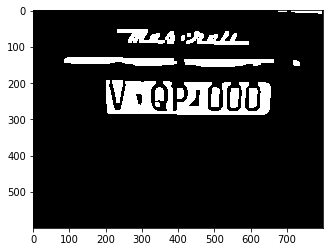

In [19]:
plt.imshow(cv.cvtColor(unknown, cv.COLOR_BGR2RGB))

In [20]:
# Marker labelling
_, markers = cv.connectedComponents(sure_background)

# Add 1 to all labels to ensure that background is 1 and non-zero
markers += 1

# Mark unkown region with 0
markers[unknown == 255] = 0

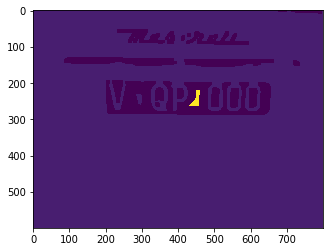

In [21]:
plt.imshow(markers)

In [22]:
markers = cv.watershed(img, markers)
img[markers == -1] = [255, 0, 0]

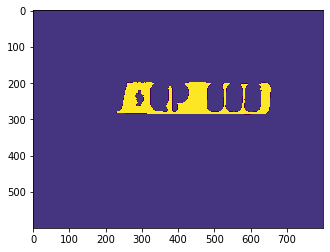

In [23]:
plt.imshow(markers)

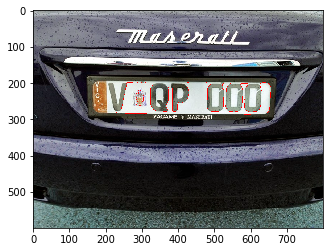

In [24]:
plt.imshow(img)